In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import pingouin as pg

Dataset source: https://www.kaggle.com/datasets/owm4096/laptop-prices

In [2]:
laptops = pd.read_csv("data/laptop_prices.csv")

In [3]:
laptops.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [5]:
laptops.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


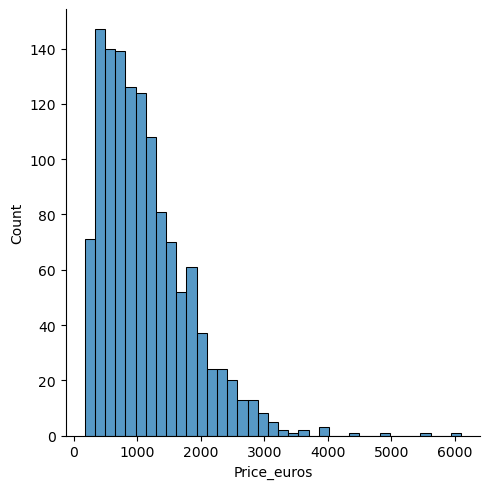

In [6]:
sns.displot(x='Price_euros',data=laptops)

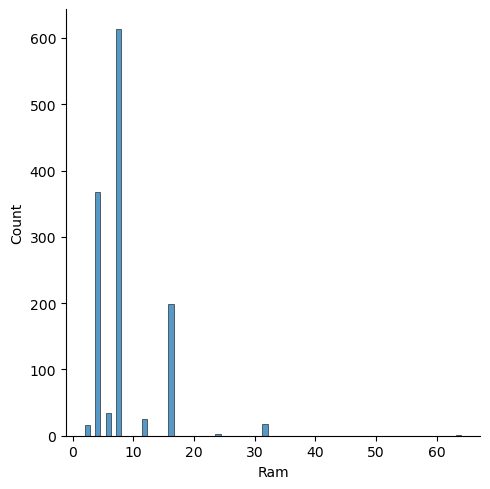

In [11]:
sns.displot(x='Ram',data=laptops)

Not much variation in RAM configurations.

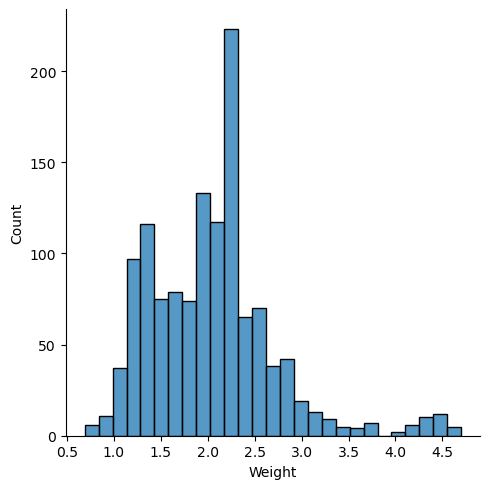

In [8]:
sns.displot(x='Weight',data=laptops)

In [15]:
from scipy.stats import normaltest
normaltest(laptops['Weight'])

NormaltestResult(statistic=np.float64(264.4553923909425), pvalue=np.float64(3.7518130313905214e-58))

In [16]:
So weight appears to be normally distributed?

Object `distributed` not found.


I'd like to take a 95% confidence interval of mean laptop weight.

In [17]:
from scipy.stats import t

In [20]:
from scipy.stats import sem
df = len(laptops) - 1
mean = laptops['Weight'].mean()
sem = sem(laptops['Weight'])

t.interval(.95,df=df,loc=mean,scale=sem)

(np.float64(2.0037584126902033), np.float64(2.077292567701954))

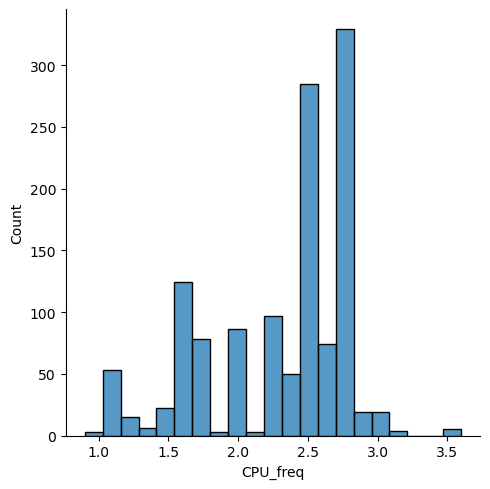

In [15]:
sns.displot(x='CPU_freq',data=laptops)

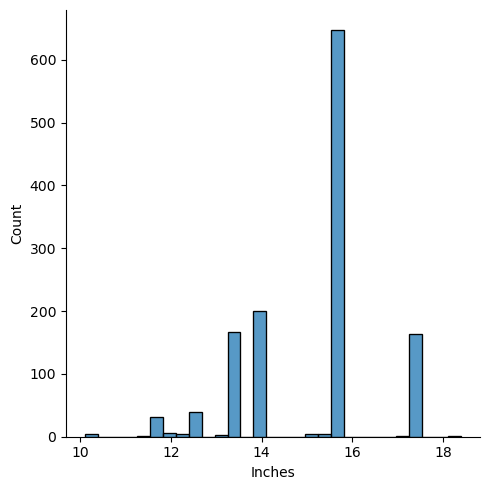

In [16]:
sns.displot(x='Inches',data=laptops)

15.5 inches seems to be the most common laptop on the market.

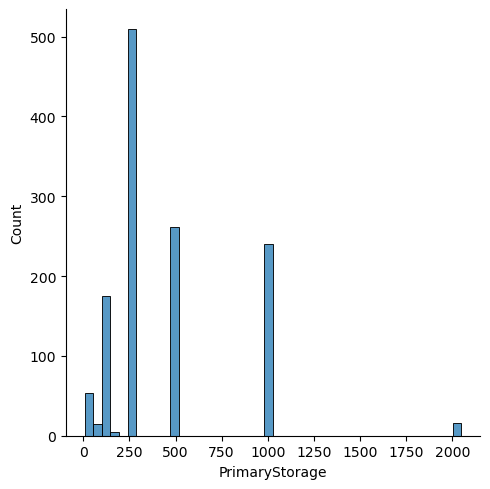

In [19]:
sns.displot(x='PrimaryStorage',data=laptops)

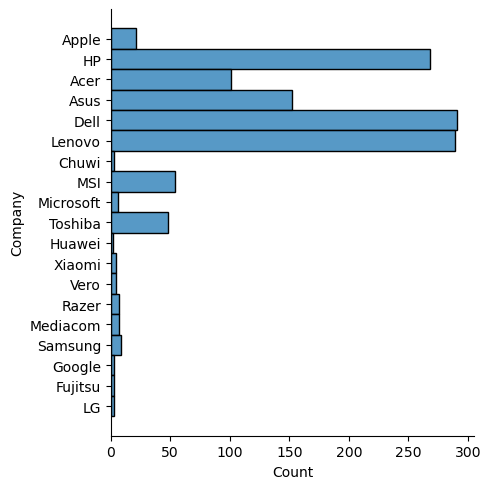

In [10]:
sns.displot(y='Company',data=laptops)

In [21]:
pg.linear_regression(laptops[['Inches','Ram','Weight','ScreenW','ScreenH','CPU_freq','PrimaryStorage','SecondaryStorage']],laptops['Price_euros'],relimp=True)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,77.106802,182.609764,0.422249,6.729149e-01,0.668173,0.666077,-281.144260,435.357863,NaN,NaN
1,Inches,-69.805177,14.896257,-4.686088,3.085625e-06,0.668173,0.666077,-99.029245,-40.581110,0.009871,1.477263
2,Ram,77.887763,2.902697,26.832894,6.158180e-126,0.668173,0.666077,72.193137,83.582389,0.315194,47.172553
3,Weight,92.035119,33.291606,2.764514,5.783482e-03,0.668173,0.666077,26.722330,157.347909,0.020591,3.081620
4,ScreenW,0.036229,0.217711,0.166410,8.678608e-01,0.668173,0.666077,-0.390884,0.463342,0.103021,15.418243
5,ScreenH,0.593050,0.378508,1.566811,1.174088e-01,0.668173,0.666077,-0.149521,1.335621,0.102757,15.378783
6,CPU_freq,284.512839,25.050971,11.357358,1.554043e-28,0.668173,0.666077,235.366853,333.658825,0.082875,12.403251
7,PrimaryStorage,-0.206969,0.035118,-5.893546,4.840667e-09,0.668173,0.666077,-0.275864,-0.138073,0.011403,1.706641
8,SecondaryStorage,-0.043377,0.035036,-1.238046,2.159285e-01,0.668173,0.666077,-0.112113,0.025359,0.022462,3.361645


In [6]:
def price(inches,ram,weight,screenw,screenh,cpu_freq,primary_storage,secondary_storage):
    return 77.11 + -69.81*inches + 77.89*ram + 92.04*ram + 0.04*screenw + 0.59*screenh + 284.51 - 0.21*primary_storage + -0.04 * secondary_storage

In [7]:
price(15.4,8,2,1440,990,2.5,512,128)

1175.0460000000003

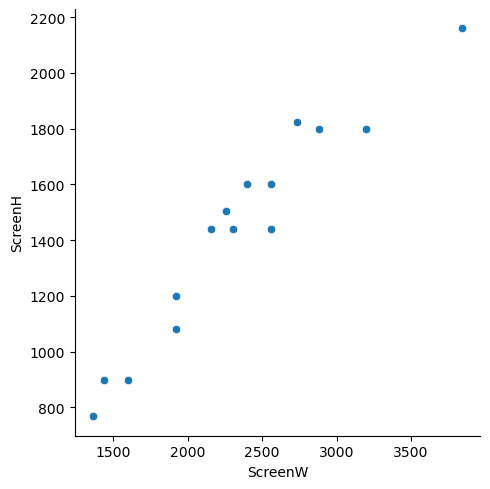

In [24]:
sns.relplot(x='ScreenW',y='ScreenH',data=laptops)

<Axes: xlabel='ScreenW', ylabel='ScreenH'>

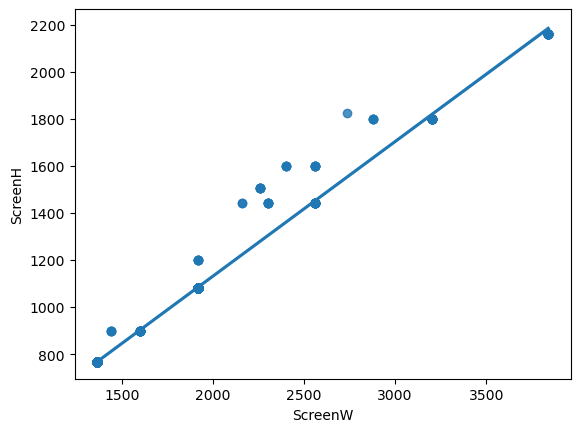

In [25]:
sns.regplot(x='ScreenW',y='ScreenH',data=laptops)

<Axes: xlabel='ScreenH', ylabel='ScreenW'>

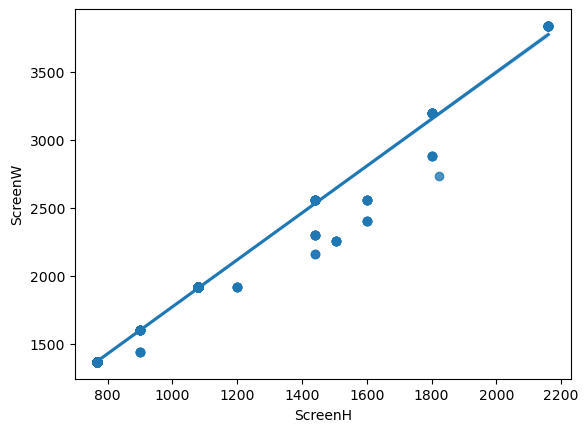

In [28]:
sns.regplot(x='ScreenH',y='ScreenW',data=laptops)

In [27]:
pg.linear_regression(laptops['ScreenW'],laptops['ScreenH'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-12.944747,3.442927,-3.759809,0.000178,0.988173,0.988164,-19.699182,-6.190312
1,ScreenW,0.572013,0.001754,326.135408,0.000000,0.988173,0.988164,0.568572,0.575453


Let's see if brand is a predictor of price.

In [30]:
pg.kruskal(data=laptops,dv='Price_euros',between='Company').round(2)

,Source,ddof1,H,p-unc
Kruskal,Company,18,220.37,0.0


In [11]:
Apple_prices = laptops.loc[laptops['Company'] == 'Apple', 'Price_euros']
Apple_prices.mean()

np.float64(1564.1985714285713)

In [12]:
Apple_prices.describe()

count      21.000000
mean     1564.198571
std       561.623595
min       898.940000
25%      1163.000000
50%      1339.690000
75%      1958.900000
max      2858.000000
Name: Price_euros, dtype: float64

In [36]:
Dell_prices = laptops.loc[laptops['Company'] == 'Dell', 'Price_euros']
Dell_prices.mean()

np.float64(1199.2251202749142)

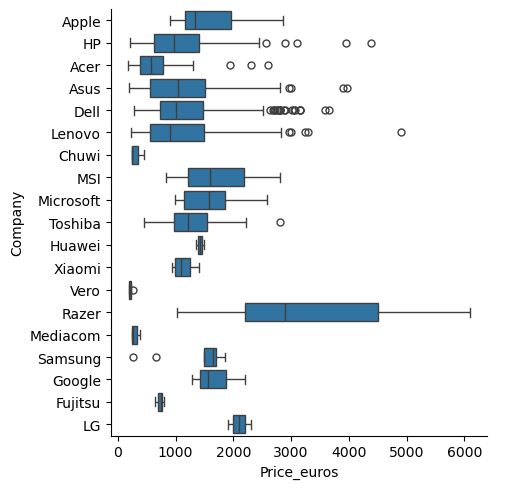

In [41]:
sns.catplot(y='Company',x='Price_euros',kind='box',data=laptops)

Apple's not the maker with the most expensive machines, Razer appears to be.

In [42]:
Razer_prices = laptops.loc[laptops['Company'] == 'Razer', 'Price_euros']
Razer_prices.mean()

np.float64(3346.1428571428573)

In [44]:
Razer_prices.max()

np.float64(6099.0)

In [45]:
Apple_prices.max()

np.float64(2858.0)

In [46]:
Razer_prices.max() - Apple_prices.max()

np.float64(3241.0)

Let's find the range of the prices overall.

In [47]:
laptops['Price_euros'].max() - laptops['Price_euros'].min()

np.float64(5925.0)

And for Apple:

In [48]:
Apple_prices.max() - Apple_prices.min()

np.float64(1959.06)

And Razer:

In [49]:
Razer_prices.max() - Razer_prices.min()

np.float64(5070.0)

In [50]:
Apple_prices.min()

np.float64(898.94)

In [4]:
pg.kruskal(data=laptops,dv='Price_euros',between='OS')

,Source,ddof1,H,p-unc
Kruskal,OS,8,184.57098,1.128139e-35


In [10]:
pg.kruskal(data=laptops,dv='Price_euros',between='OS').round(2)

,Source,ddof1,H,p-unc
Kruskal,OS,8,184.57,0.0


In [8]:
pg.kruskal(data=laptops,dv='Price_euros',between='CPU_company')

,Source,ddof1,H,p-unc
Kruskal,CPU_company,2,67.778381,1.914748e-15


In [9]:
pg.kruskal(data=laptops,dv='Price_euros',between='CPU_company').round(2)

,Source,ddof1,H,p-unc
Kruskal,CPU_company,2,67.78,0.0


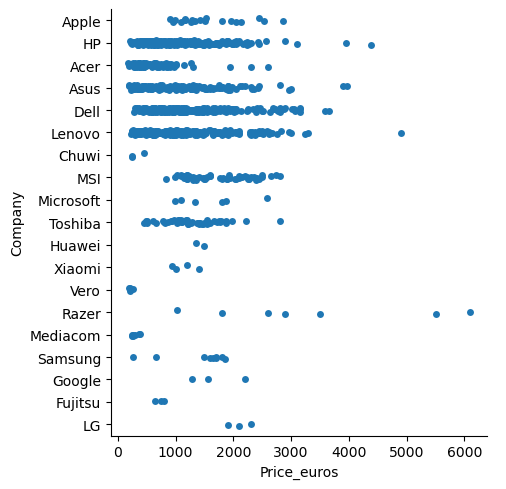

In [14]:
sns.catplot(y='Company',x='Price_euros',data=laptops)

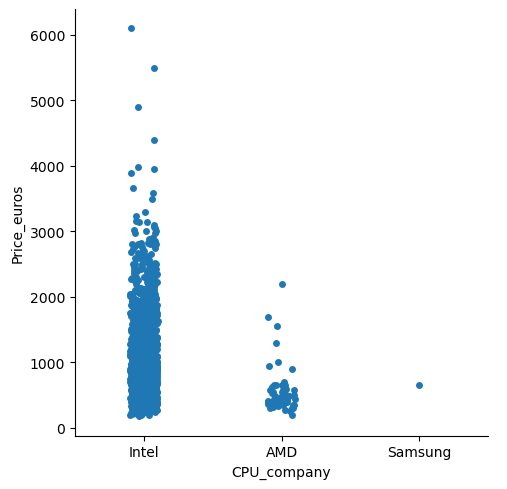

In [20]:
sns.catplot(x='CPU_company',y='Price_euros',data=laptops)

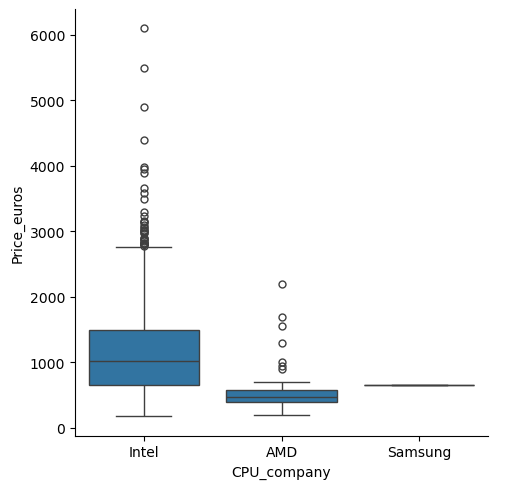

In [21]:
sns.catplot(x='CPU_company',y='Price_euros',kind='box',data=laptops)

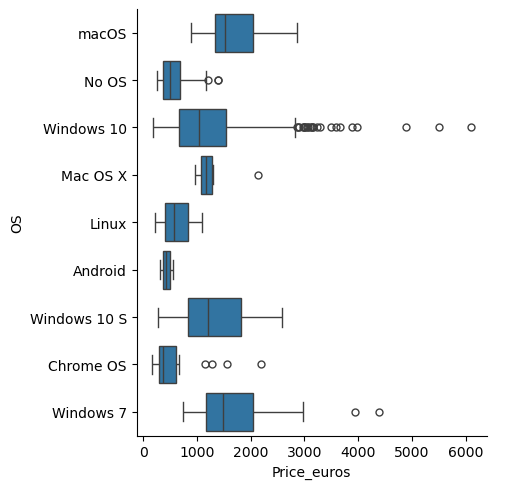

In [23]:
sns.catplot(y='OS',x='Price_euros',kind='box',data=laptops)